In [17]:
import pandas as pd

# Chargement du dataset
df = pd.read_csv('HeartDiseaseUCI.csv')


In [33]:
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0


In [18]:

# Résumé statistique
df.describe()



,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [19]:
# Types de données
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          299 non-null    float64
 13  thal        301 non-null    float64
 14  num         303 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 35.6 KB


In [20]:

# Valeurs manquantes
df.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            4
thal          2
num           0
dtype: int64

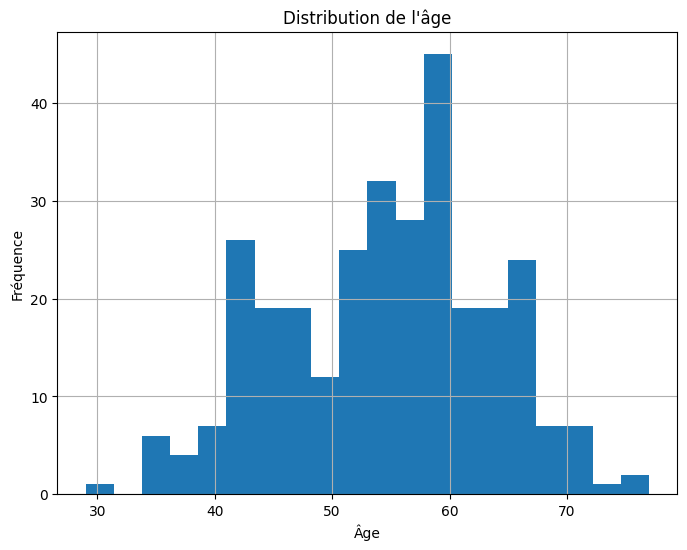

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme de l'âge
plt.figure(figsize=(8, 6))
df['age'].hist(bins=20)
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()



In [22]:
df.head(5)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [23]:
df['num'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [24]:
# Si la colonne contient déjà des nombres mais avec des valeurs supérieures à 1 pour les malades, on peut aussi faire ceci :
df['num'] = df['num'].apply(lambda x: 1 if x != 0 else 0)

In [25]:
df['num'].unique()

array([0, 1], dtype=int64)

In [26]:
# Suppression d'une colonne (par exemple, 'colonne_a_supprimer')
df = df.drop(columns=['Unnamed: 0'])

In [27]:
df = df.dropna()

In [28]:
#df.fillna(df.median())

In [29]:
# Remplacer les valeurs manquantes par la médiane pour certaines colonnes
#df['thal'].fillna(df['thal'].median())


In [30]:
# Remplacer les valeurs manquantes par la médiane pour certaines colonnes
#df['ca'].fillna(df['ca'].mean())


In [31]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [32]:
#df.to_csv('HeartDiseaseUCI1.csv', index=False)